In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
uniform = np.random.uniform(0, 1, size=(1000,))
normal_sigma_1 = np.random.normal(loc=0, scale=1, size=(1000,))
normal_sigma_10 = np.random.normal(loc=0, scale=10, size=(1000,))
ab_pairs = [(1, 1), (2, 2), (3, 9)]
betas = [np.random.beta(a=p[0], b=p[1], size=(1000,)) for p in ab_pairs]
multivariate_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=(10000,))
multivariate_2 = np.random.multivariate_normal(mean=[0, 0], cov=[[2, 1], [1, 2]], size=(10000,))

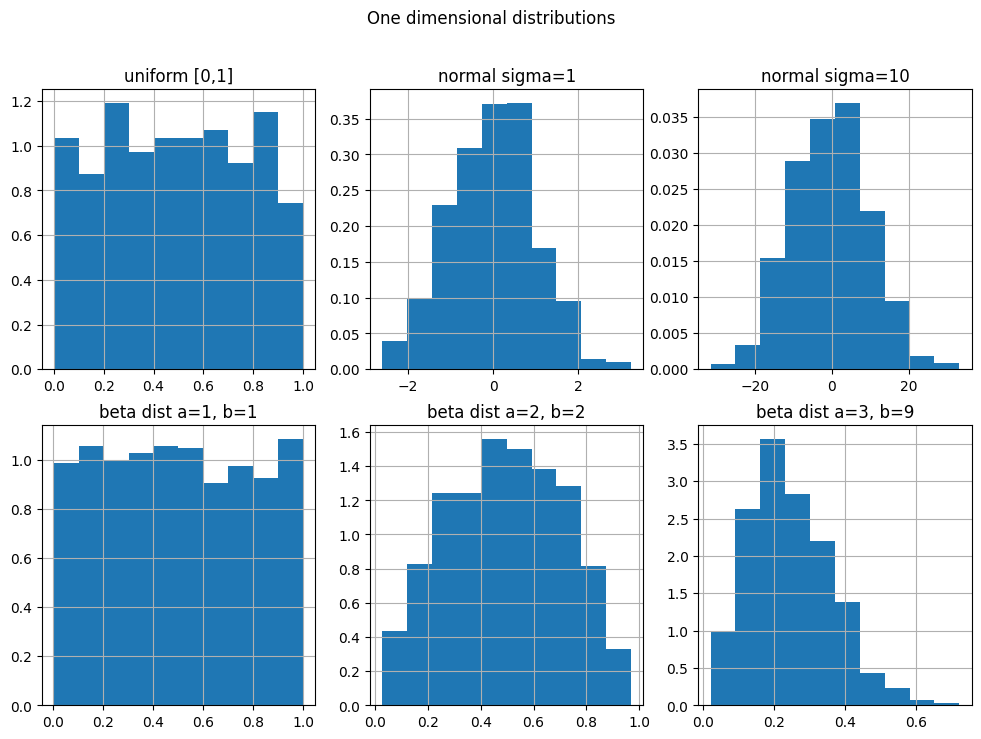

In [48]:
dists = [uniform, normal_sigma_1, normal_sigma_10, *betas]
names = ['uniform [0,1]', 'normal sigma=1', 'normal sigma=10'] + [f'beta dist a={a}, b={b}' for a, b in ab_pairs]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i, (name, dist) in enumerate(zip(names, dists)):
    axes[i].hist(dist, density=True)
    axes[i].set_title(name)
    axes[i].grid()
fig.suptitle("One dimensional distributions")
plt.show()

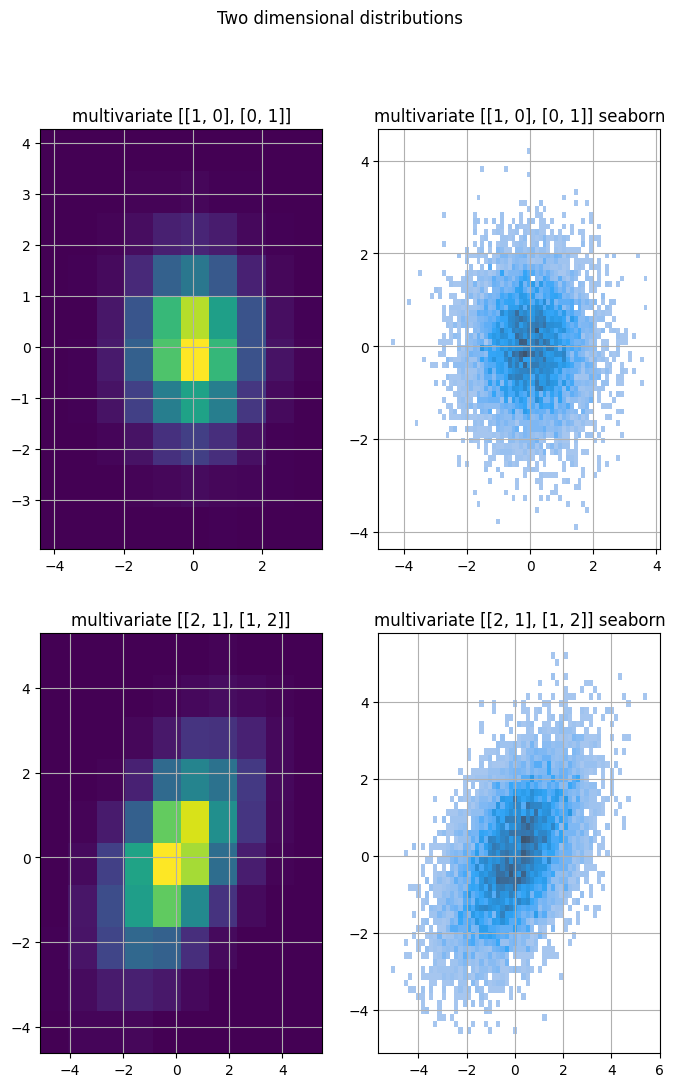

In [72]:
import seaborn as sns
dists_2D = [multivariate_1] * 2 + [multivariate_2] * 2
names = ['multivariate [[1, 0], [0, 1]]',
         'multivariate [[1, 0], [0, 1]] seaborn',
         'multivariate [[2, 1], [1, 2]]',
         'multivariate [[2, 1], [1, 2]] seaborn']
fig, axes = plt.subplots(2, 2, figsize=(8, 12))
axes = axes.flatten()
for i, (name, dist) in enumerate(zip(names, dists_2D)):
    if i % 2 == 1:
        sns.histplot(x=dist[:, 0], y=dist[:, 1], ax=axes[i])
    else:
        axes[i].hist2d(dist[:, 0], dist[:, 1], density=True)
    axes[i].set_title(name)
    axes[i].grid()
fig.suptitle("Two dimensional distributions")
plt.show()

In [59]:
import random
# TODO: try to vectorize it
ys = []
xs = []
alphas = []
betas = []
for _ in range(1000):
    alpha = random.gauss(2, 0.1)
    beta = random.gauss(0.2, 0.2)
    x = random.gauss(0, 3)
    sigma = abs(random.gauss(0, 1))
    u = beta*x + alpha
    xs.append(x)
    alphas.append(alpha)
    betas.append(beta)
    ys.append(random.gauss(u, sigma))
len(ys)

1000

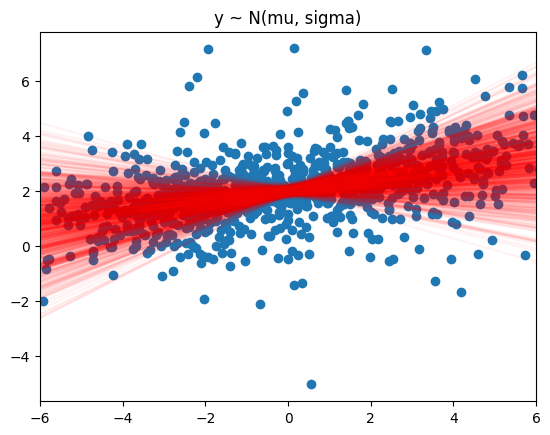

In [71]:
plt.scatter(xs, ys)
for a, b in zip(alphas, betas):
    x = np.linspace(-6, 6, 100)
    y = b * x + a
    plt.plot(x, y, 'r', alpha=0.05)
plt.xlim([-6, 6])
plt.title('y ~ N(mu, sigma)')
plt.show()